**QUANTUM COMPUTING**

In [1]:
!pip install qiskit ipywidgets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 8.1 MB/s eta 0:00:00


In [2]:
!pip install qiskit qiskit-ibm-runtime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.2/353.2 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.5/69.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 9.5 MB/s eta 0:00:00
  Attempting uninstall: pydantic-core
    Found existing installation: pydantic_core 2.33.1
    Uninstalling pydantic_core-2.33.1:
      Successfully uninstalled pydantic_core-2.33.1
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.11.3
    Uninstalling pydantic-2.11.3:
      Successfully uninstalled pydantic-2.11.3


In [3]:
!pip install qiskit[visualization]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=582d47db15f6f06f2ffe275a8202dcaf2fbdadac6040651f258e6eefce14981c
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


In [4]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import UGate
from numpy import pi

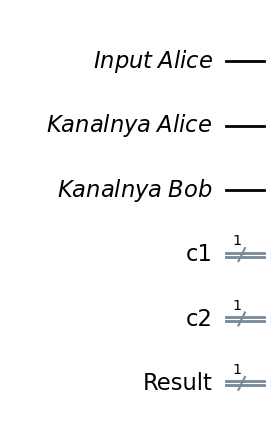

In [5]:
Input = QuantumRegister(1, "Input Alice")
Alice = QuantumRegister(1, "Kanalnya Alice")
Bob = QuantumRegister(1, "Kanalnya Bob")
c1 = ClassicalRegister(1, "c1")
c2 = ClassicalRegister(1, "c2")
Result = ClassicalRegister(1, "Result")

#define the circuit qc
qc = QuantumCircuit(Input, Alice, Bob, c1, c2, Result)
qc.draw('mpl')

In [6]:
qc.h(Alice)

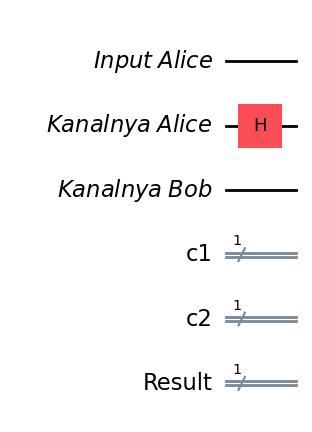

In [7]:
qc.draw('mpl')

In [8]:
qc.cx(Alice, Bob)

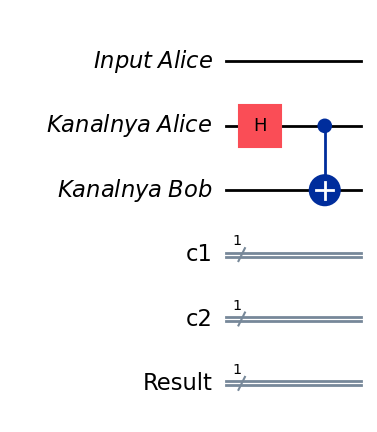

In [9]:
qc.draw('mpl')

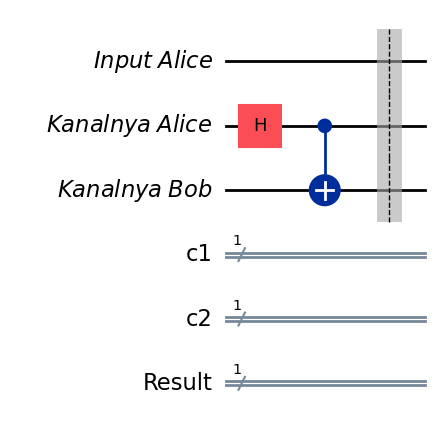

In [10]:
qc.barrier()
qc.draw('mpl')

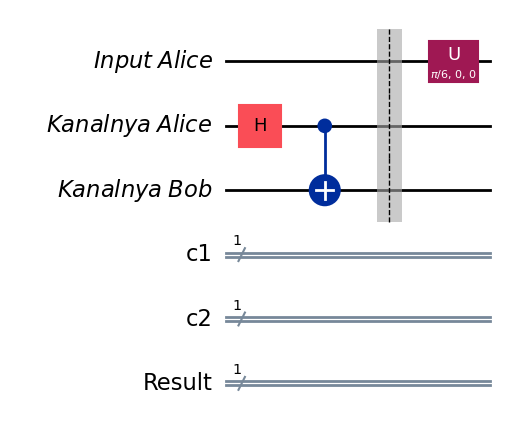

In [11]:
Gate_Input=UGate(theta=30*pi/180,phi=0*pi/180, lam=0*pi/180)
qc.append(Gate_Input, Input)
qc.draw('mpl')

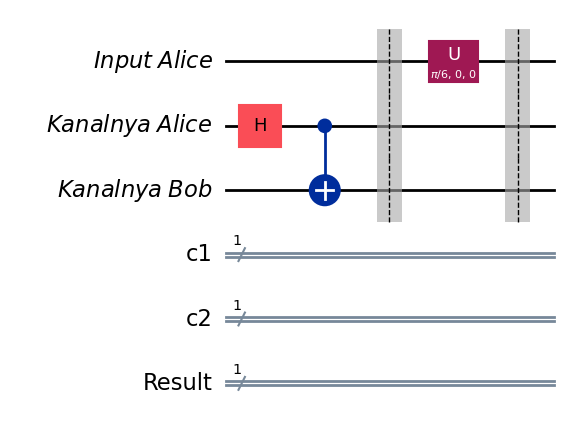

In [12]:
qc.barrier()
qc.draw('mpl')

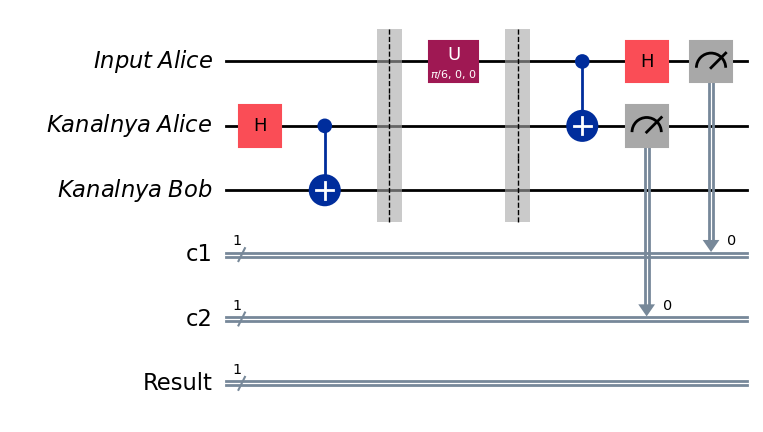

In [13]:
qc.cx(Input, Alice)
qc.h(Input)
qc.measure(Input, c1)
qc.measure(Alice, c2)
qc.draw('mpl')

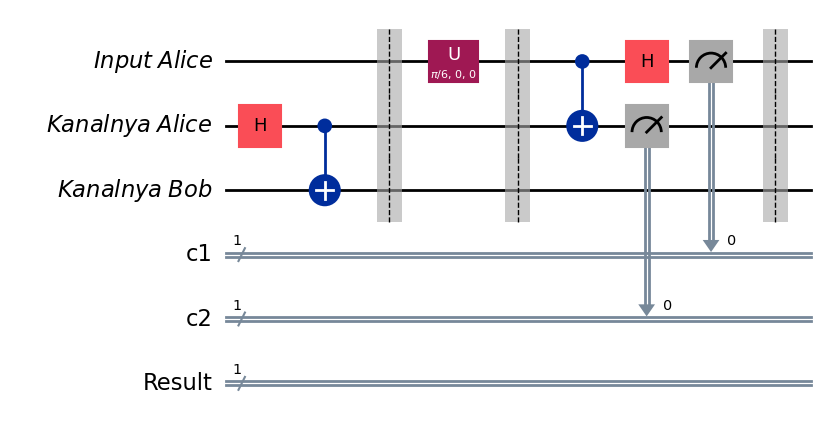

In [14]:
qc.barrier()
qc.draw('mpl')

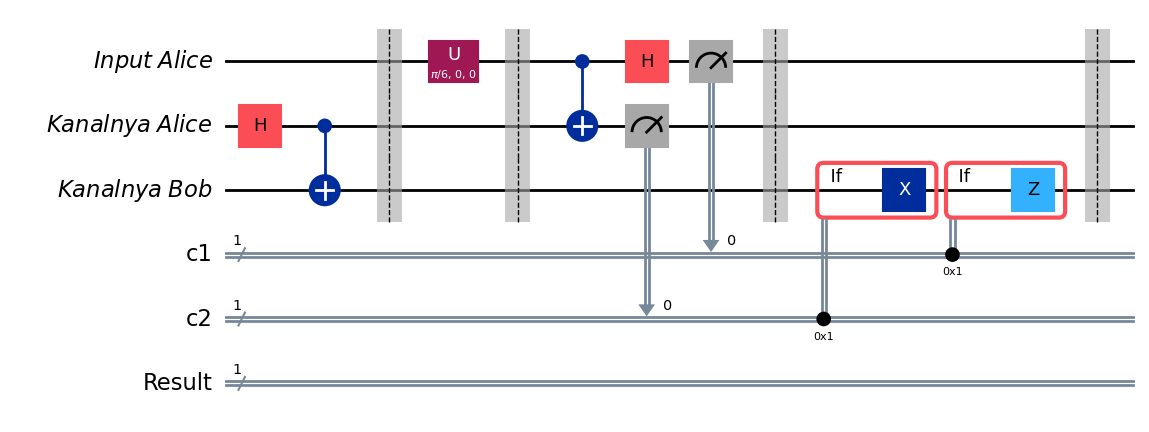

In [15]:
with qc.if_test((c2,1)):
    qc.x(Bob)
with qc.if_test((c1,1)):
    qc.z(Bob)
qc.barrier()
qc.draw('mpl')

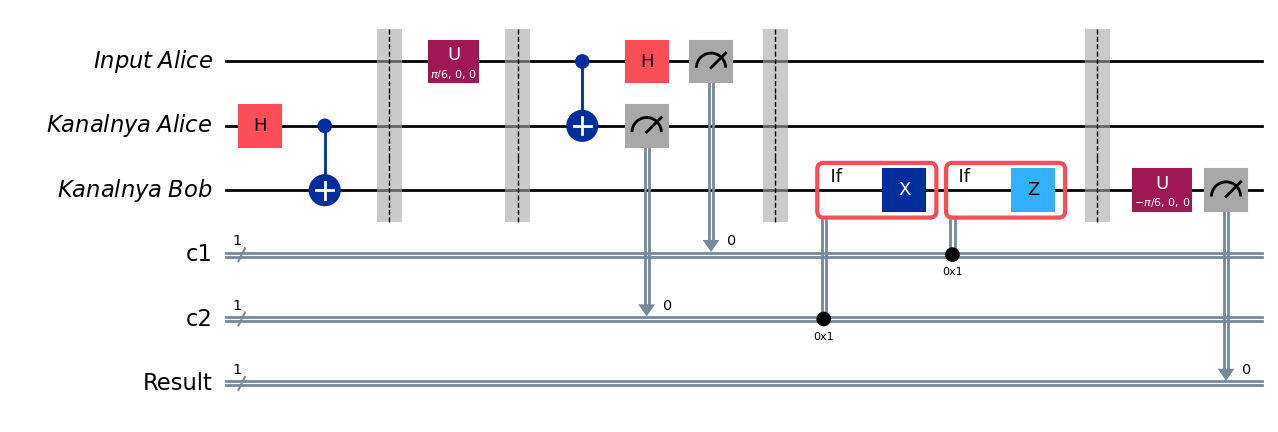

In [16]:
qc.append(Gate_Input.inverse(), Bob)
qc.measure(Bob, Result)
qc.draw('mpl')

In [17]:
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 40.3 MB/s eta 0:00:00


In [18]:
from qiskit_aer import AerSimulator

In [19]:
hasil_simulasi = AerSimulator(shots=4000).run(qc).result()

In [20]:
statistik = hasil_simulasi.get_counts()

In [21]:
from qiskit.visualization import plot_histogram

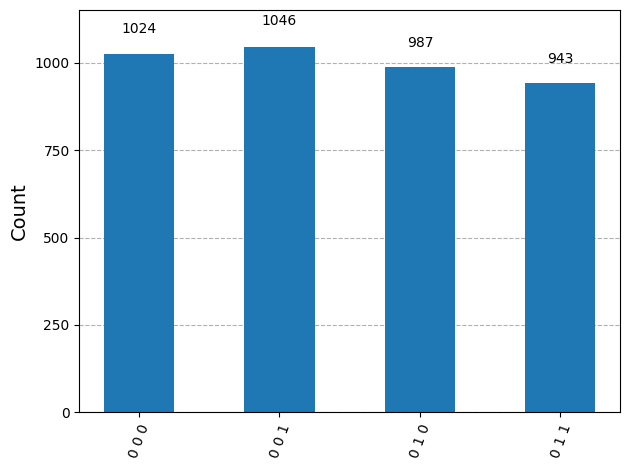

In [22]:
display(plot_histogram(statistik))

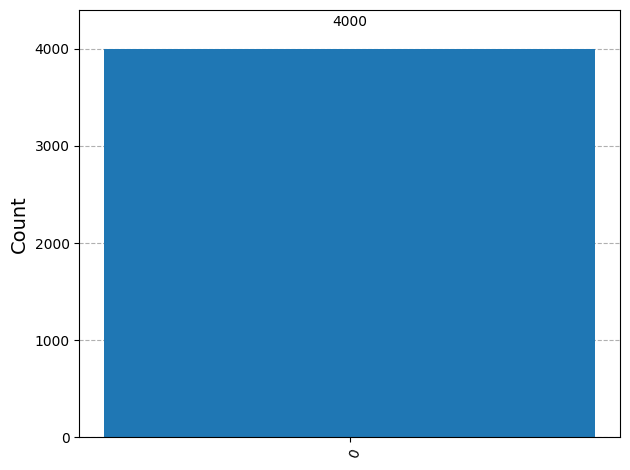

In [23]:
from qiskit.result import marginal_distribution
filter_statistik = marginal_distribution(statistik, [2])
display(plot_histogram(filter_statistik))

In [24]:
token="75f366791e2eff126e2541002cac30654fad9a888623d0cef0c681802094427015c18e2f86323ba439981f68c77834b7bb6566f0fa75c33878991440a39c25d1"
from qiskit_ibm_runtime import QiskitRuntimeService

In [27]:
from qiskit_ibm_runtime import QiskitRuntimeService

QiskitRuntimeService.save_account(
  token=token,
  channel="ibm_quantum" # `channel` distinguishes between different account types
)

In [28]:
# Load saved credentials
service = QiskitRuntimeService()

<ipython-input-28-37725476cd91>:2: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, ibm_cloud will be the only valid channel. For information on migrating to the new IBM Quantum Platform on the "ibm_cloud" channel, review the migration guide https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp .
  service = QiskitRuntimeService()


In [29]:
service.backends()

[<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_sherbrooke')>]

In [33]:
from qiskit import transpile
backendIBM = service.backend("ibm_brisbane") #memilih backend
transpiled_circuit = transpile(qc, backendIBM) #menyesuaikan dan mengoptimalisasi ke sistem sesuai backend yang diambil

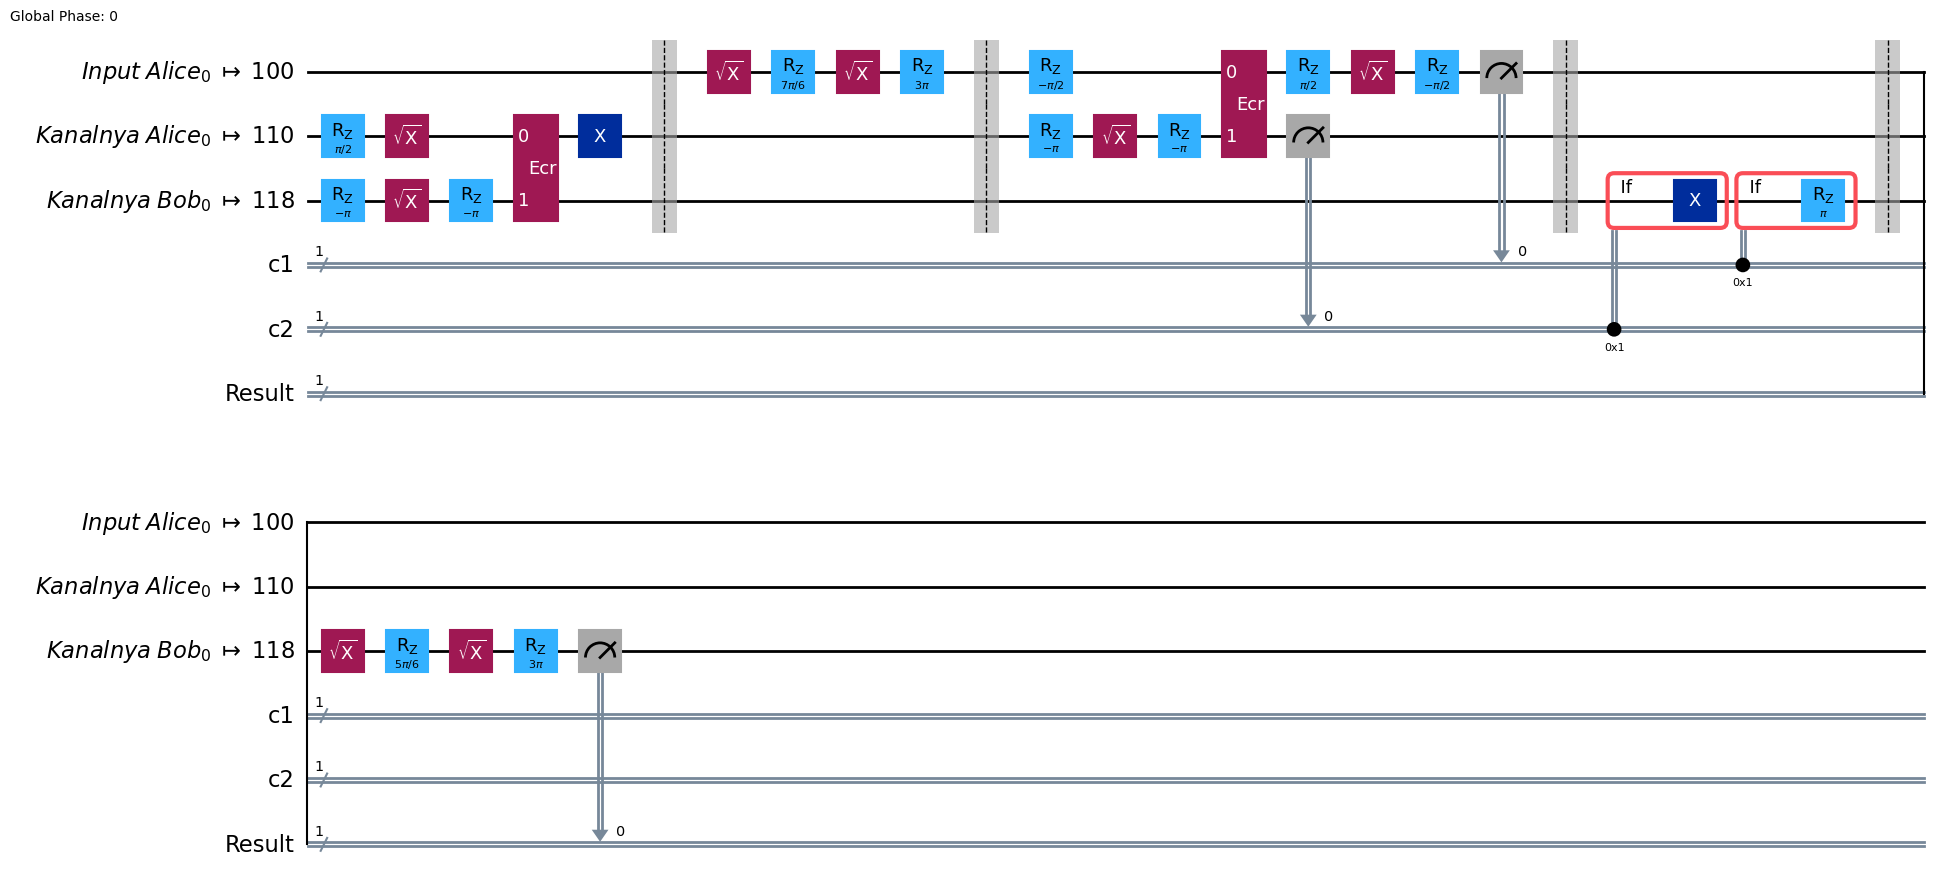

In [34]:
transpiled_circuit.draw('mpl')

In [35]:
from qiskit_ibm_runtime import SamplerV2 as Sampler

In [36]:
sampler = Sampler(backendIBM)
job = sampler.run([transpiled_circuit])
print(f"Job ID: {job.job_id()}")

Job ID: d0a15bdrxz8g008a6b7g


In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q/open/main',
    token='75f366791e2eff126e2541002cac30654fad9a888623d0cef0c681802094427015c18e2f86323ba439981f68c77834b7bb6566f0fa75c33878991440a39c25d1'
)
job = service.job('d02sb3m6rr3g008s4mrg')
job_result = job.result()

# To get counts for a particular pub result, use
#
# pub_result = job_result[<idx>].data.<classical register>.get_counts()
#
# where <idx> is the index of the pub and <classical register> is the name of the classical register.
# You can use circuit.cregs to find the name of the classical registers.

In [ ]:
print(job_result)

In [ ]:
print(type(job_result))  # Is it PrimitiveResult, Result, or something else?
print(dir(job_result))   # List all available attributes

In [ ]:
print(qc.cregs)


In [ ]:
pub_result = job_result[0]  # First (and only) pub result in this case
counts = pub_result.data.Result.get_counts()  # Get classical register counts
print(counts)

In [ ]:
pub_result = job_result[0].data.Result.get_counts()
print(counts)

In [ ]:
display(plot_histogram(counts))